# Project: Investigate a Dataset - TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that I chose to analyze was the TMDb dataset. This dataset contains movie and rating information for 5000 movies, ranging from 1965 until 2015. 

Along with some basic explorations, such as popular keywords, actors and movies, some trends we will be exploring include:

- Amount budgeted compared to film popularity;
- Number of movies an actor is in, compared to the average popularity of films they were casted in and average revenue generated;

Specifically, I would like to know if there is a correlation between the amount budgeted for a movie, and how popular it was. I would also like to further explore how popularity and revenue are related.

Caveat: This report is by no means conclusives, as the investigation methods we will be using are considered descriptive. Any suspected associations will need to be further validated using more advanced statistically-backed methods. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import seaborn as sns
import os 

from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

As part of the basic evluation, we have noted the following:

- Rows: 10866
- Columns: 21
- There are columns with more than 5% of values missing - production_companies and keywords - which will need to be dealt with
- Some datatypes are not ideal and will need to be converted

In [9]:
#read the csv into a dataframe
df = pd.read_csv('E:\\source\\jubilant-garbanzo\\tmdb-movies.csv')

In [10]:
#Look at the first few rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
#Check to see how many rows and columns are found in the dataset
df.shape

(10866, 21)

In [12]:
#Calculate sum of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
#calculate percentage of null values
(df.isnull().sum())/df.shape[0]*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [14]:
#Confirm datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

Although the data isn't too messy, there are certain things that will need to be improved upon.

- Remove Duplicate Rows: There is one fully duplicate record that will be deleted;
- Rounding and Data Type Modifications: Popularity and Vote Average will be rounded to two decimal places, and Release Year will be converted to datetime;
- Removal of Unnecessary Columns: We will be removing columns that are not needed in our analysis;
- Populate missing keywords: We will be comparing keywords with words found in the overview column in order to fill in missing values. Specifically, we will first use the Porter Stemmer Algorithm to group keywords by their root word, and then group keywords based on common synonyms. From this, we will be compare words found in the overview section and populate the movie with the mapped keyword;

#### Duplicate Rows

First, we need to evaluate as to whether or not there are any duplicate rows.

In [15]:
#Check to see how many full duplicates there are 
sum(df.duplicated())

1

In [16]:
df[df.duplicated(keep=False) == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Since the rows are identical, we will drop one of the rows, and then reindex the dataframe.

In [17]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

In [18]:
df = df.reindex()

#### Datatype Conversion and Rounding

The release date column will be converted to pandas datetime datatype so that I can take advantage of pre-built functionality. As part of the transformation process, I will also be rounding the popularity score and vote average columns to two decimals. 

In [19]:
#round popularity and vote_average columns
df = df.round({'popularity' : 2, 'vote_average' : 2})

In [20]:
#convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#### Removal of Unnecessary Columns

To make the dataset for manageable, I've decided to remove the id, imdb_id, homepage, tagline, budget_adj, and revenue_adj columns.

In [21]:
#Get a list of current columns
cols_list = list(df.columns.values)
cols_list

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [22]:
#copy paste list, and delete columns that are not necessary for analysis

cols_keep = [
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'keywords',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'overview']

df = df[cols_keep]

In [23]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,overview
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Twenty-two years after the events of Jurassic ...
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,An apocalyptic story set in the furthest reach...
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Beatrice Prior must confront her inner demons ...
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Thirty years after defeating the Galactic Empi...
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Deckard Shaw seeks revenge against Dominic Tor...


#### Address Missing Values - Missing Values In Order of Significance 

1. Keywords - 13.74% missing;
2. Production Companies - 9.48% missing;
3. Cast - 0.7% missing;
4. Director - 0.40% missing;
5. Genres - 0.21% missing;

The keywords and production companies columns are the only ones with a significant amount of results missing. 

For keywords, the strategy will be to normalize the results as much as possible and compare the overview with normalized keywords. If the overview has any of the normalized keywords, or their synonyms, I will be adding the keyword to the results. 

This will be a three step process - first I will be grouping the keywords by their root word using the Porter Stemmer Algorithm, and replacing similarly grouped words with a single word for consistency. 

For example, within the dataset, addiction (7), addict (1) and addicted (1) are listed. For the purposes of the analysis, these words can be considered the same. 

Then, I will be grouping words by common synonyms. If the title of a movie consists of any of the grouped synonyms, I will be adding the most commonly used synonym to the results. As a last step, I will be replacing the less used synonyms with the most commonly used synonym.

For missing production companies, while I would love to address this, I could not come up with a strategy without relying on additional data sources. 

##### Grouping Words by their Root

**Helper Functions**

In [24]:
#convert keywords into a list per movie, and remove the pipe line separator

def to_list_no_pipe(df, col):
    """
    Function takes all values for a row found within a column, and places them into their own list. 
    Takes pandas dataframe (df) and a column name (col) as input.
    """
    df[col] = df[col].str.split('|').values
    
    return df[col]

In [25]:
#Group all occurrences of keywords, and count how many times they appear

def word_occurrence(df, df_col):
    
    """
    For columns that contain lists: This function will take all data from each of a single column, and create a list of lists
    with each list representing a row. From this, the occurrences for each word will be calculated. Takes as input a dataframe
    (df) and a dataframe column (df_col). 
    """
    keylist = df[df_col].tolist() #adds values from column to a list of lists - each row is represented as a list
    keylist
    
    
    flattened_keylist = [] #flattens list so all values are in a single list
    
    for sublist in keylist:
        if type(sublist) == float:
            continue
        else:
            for item in sublist:
                flattened_keylist.append(item)
                
    keylist_counts = {} #adds list values to a dict, and counts the amount of occurences per value
    
    for i in range(len(flattened_keylist)):
        if flattened_keylist[i] not in keylist_counts:
            keylist_counts[flattened_keylist[i]] = 1
        else:
            keylist_counts[flattened_keylist[i]] += 1
            
    sorted_keylist_counts = [] #transfer values to a list so that they can be sorted

    for k,v in keylist_counts.items():
        sorted_keylist_counts.append([k,v])
        
    sorted_keylist_counts.sort(key = lambda x:x[1], reverse=True)
            
    return sorted_keylist_counts

In [26]:
#function to evaluate and group keywords by their word roots

def stem_words_and_group(keyword_counts):
    """
    Purpose of function: Group keywords based on their root (Porter Stemmer Algorithm) and from there,
    create a dict for mapping purposes. Takes the keyword_counts variable - which is returned from the word_occurrences function.
    """
    root_words = {}
    ps = PorterStemmer()

    for row in keyword_counts: #transform keyword to lowercase, and stems keyword - omits nulls
        word_stem = row[0].lower()
        word_stem = ps.stem(word_stem)

        if word_stem not in root_words: #add results to root_words dict
            root_words[word_stem] = [row[0]]
        else: 
            root_words[word_stem].append(row[0])
            
    
    root_word_values = root_words.values() #Take values and put them into a list so that grouped words can be counted and sorted
    root_word_group = list(root_word_values)
    keywords = [] #To keep of tally of words to compare titles with
    
    
    for word_group in root_word_values:
        counts = len(word_group)
        word_group.append(counts)
        keywords.append(word_group[:-1])
        
    #keywords is a list of list - flatten to one list
    flat_keywords = []
    
    for kw in keywords:
        for w in kw:
            flat_keywords.append(w)
    
    
    #sort by amount of words that share the same stem - from highest to lowest
    root_word_group.sort(key = lambda x:x[-1], reverse=True)
    
    root_words_list = []
    
    #list for words that have at least two keywords that share the same stem - if the stem of a word is unique, the word is 
    #omitted from the results
    
    for grouped_words in root_word_group:
        if grouped_words[-1] > 1:
            root_words_list.append(grouped_words)

    word_mapping_dict = {}
    
    #Determines the keyword that will be considered the main word per word stemp grouping for mapping purposes. Key will
    #be the word that is being replaced, and value is the replacement word.            
    
    for grouped_words_by_root in root_words_list:
        main_word = grouped_words_by_root[0]
        
        for w in grouped_words_by_root:
            if w == main_word:
                continue
                
            elif type(w) == str:
                word_mapping_dict[w] = main_word
    
    
    return flat_keywords, root_words_list, word_mapping_dict

In [27]:
#keyword replacement function so that we can have a better representation of keyword counts - 
#function to replace keywords from the word_mapping dictionary with their corresponding main word

def replace_word(df, col, word_map):
    """
    Takes pandas dataframe (df), and column name(col) along with word_map dict from root_word_func.
    The purpose is to replace a word that shares the same stem with a common word.
    """
    for row in df[col]:
        if type(row) == float:
            continue
        else:
            for i in range(len(row)):
                if row[i] in word_map:
                    row[i] = word_map[row[i]]
    
    return df[col]

**Group Words**

In [28]:
df['keywords'] = to_list_no_pipe(df, 'keywords')

In [29]:
#pipe has been split, and keywords are now in a list for ease of references
df['keywords'].head()

0    [monster, dna, tyrannosaurus rex, velociraptor...
1    [future, chase, post-apocalyptic, dystopia, au...
2    [based on novel, revolution, dystopia, sequel,...
3          [android, spaceship, jedi, space opera, 3d]
4            [car race, speed, revenge, suspense, car]
Name: keywords, dtype: object

In [30]:
#Group and total keywords
keyword_counts = word_occurrence(df, 'keywords')
keyword_counts[:10]

[['woman director', 413],
 ['independent film', 396],
 ['based on novel', 278],
 ['sex', 272],
 ['sport', 216],
 ['murder', 204],
 ['biography', 169],
 ['musical', 169],
 ['new york', 163],
 ['suspense', 159]]

In [31]:
#Check to see how many keywords there are 
len(keyword_counts)

7878

In [32]:
#keyword counts before word transformation for comparison purposes - addiction, addicted and addict will be grouped together
#once the transformation occurs

original_keyword_counts = keyword_counts

original_keyword_dict = {}

for item in original_keyword_counts:
    original_keyword_dict[item[0]] = item[1]

In [33]:
original_keyword_dict['addiction']

7

In [34]:
original_keyword_dict['addict']

1

In [35]:
original_keyword_dict['addicted']

1

**Replace Keywords**

In [36]:
#stem and group words based on common root words
keyword_list, stem_words_list, root_map = stem_words_and_group(keyword_counts)

In [37]:
#replace keywords in keyword column of dataframe with grouped keywords
df['keywords'] = replace_word(df, 'keywords', root_map)

**Test**

In [38]:
new_keylist_count = word_occurrence(df, 'keywords')
new_keylist_count[:5]

[['woman director', 413],
 ['independent film', 396],
 ['based on novel', 278],
 ['sex', 272],
 ['musical', 221]]

In [39]:
len(new_keylist_count)

7626

In [40]:
new_keyword_dict = {}

for item in new_keylist_count:
    new_keyword_dict[item[0]] = item[1]

new_keyword_dict['addiction']

9

##### Group Words Based on Synonyms

In [41]:
#Find synonyms based on the WordNet Database using the NLTK-WordNet interface, and create mapping back to keyword

def find_synonyms(flat_keywords):

    s_map = {}
    
    for w in flat_keywords:
        for syn in wn.synsets(w):
            for l in syn.lemma_names():
                s_map[l] = w
    
    synonym_map = {}
    
    #add items from s_map to synonym_map where dict key does not match dict value
    for k, v in s_map.items():
        if k == v:
            continue
        else:
            synonym_map[k] = v
        
    return synonym_map

In [42]:
#merge the synonym mapping and root word mapping dicts so that synonyms are also pointing to the main word

def merge_syn_root_dicts(syn_dict, root_dict):
    
    mapping_dict = root_dict
    
    #if synonym (v from syn_dict) matches a key from root_dict, synonym will be mapped to value found in root_dict
    #if synonym matches a value from root_dict, synonym will be mapped to same value
    
    for k,v in syn_dict.items():
        if v in mapping_dict.keys():
            mapping_dict[k] = mapping_dict[v]
        elif v in mapping_dict.values():
            mapping_dict[k] = v
            
    return mapping_dict

In [43]:
#function to remove stop words from overview or title columns

def remove_stopwords_new_col(df, col):
    
    words_to_process = df[col].tolist()
    clean_list = []
    
    for row in words_to_process:
        
        if type(row) == str:
            wordlist = row.split(" ")
            temp_list = []

            for word in wordlist:
                if word not in stopwords.words("english"):
                    temp_list.append(word)

            clean_list.append(temp_list[:])
        
        else:
            clean_list.append(np.nan)
            
    clean_overview = pd.Series(clean_list[:]) 
    df = df.assign(updated_col=clean_overview.values)
    
    return df

In [44]:
## Function to compare words with combined mapping dictionary

def word_comp(df, col, mapping):
    
    words_to_compare = df[col].tolist()
    keywords = []
    
    for row in words_to_compare:
        temp_list = []
        
        if type(row) == float:
            temp_list = np.nan
            keywords.append(temp_list)
            continue
        
        for word in row:
            if word in mapping.keys():
                temp_list.append(mapping[word])
            elif word in mapping.values():
                temp_list.append(word)

        if len(temp_list) == 0:
            temp_list = np.nan

        keywords.append(temp_list)


    new_keywords = pd.Series(keywords[:]) 
    df = df.assign(new_keywords=new_keywords.values)

    return df

**Group Words**

In [45]:
#synonym mapping dictionary
syn_map = find_synonyms(keyword_list)

In [46]:
#combine root word and synonym mapping dictionaries
mapping = merge_syn_root_dicts(syn_map, root_map)

**Replace Words**

In [47]:
#consolidate keywords
df['keywords'] = replace_word(df, 'keywords', mapping)

##### Compare Overview to Keywords to Populate Missing Keywords

In [48]:
#Create a new dataframe that includes only rows with missing keywords
df_missing_keywords = df[df['keywords'].isnull() == True]

In [49]:
#Remove problematic characters and spaces
df_missing_keywords['overview'] = df_missing_keywords['overview'].str.replace('[^\w\s]','')

C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
df_missing_keywords['overview'] = df_missing_keywords['overview'].str.lower()

C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
#remove stopwords from overview columns
df_missing_keywords = remove_stopwords_new_col(df_missing_keywords, 'overview')

In [52]:
#compare overview to keywords
df_missing_keywords = word_comp(df_missing_keywords, 'updated_col', mapping)

In [53]:
#Populate the keyword column with new keywords, and drop columns that we no longer need
df_missing_keywords['keywords'] = df_missing_keywords['new_keywords']
df_missing_keywords = df_missing_keywords.drop(columns=['overview','updated_col', 'new_keywords'])

In [54]:
#Populate main dataframe
df['keywords'] = df['keywords'].fillna(df_missing_keywords['keywords'])

In [55]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                 301
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
overview                   4
dtype: int64

Less than 5% of keywords are now missing, and I am comfortable in continuing with the analysis.

In [56]:
(df.isnull().sum())/df.shape[0]*100

popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.699494
director                0.404970
keywords                2.770364
runtime                 0.000000
genres                  0.211689
production_companies    9.479982
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
overview                0.036815
dtype: float64

To keep things consistent, I will be modifying the format of the genres, production companies and cast columns so that they match the keyword format.

In [57]:
df['cast'] = to_list_no_pipe(df, 'cast')
df['genres'] = to_list_no_pipe(df, 'genres')
df['production_companies'] = to_list_no_pipe(df, 'production_companies')

<a id='eda'></a>
## Exploratory Data Analysis

The first thing I would like to do is see what keywords, genres, production companies and actors are most popular across the dataset. I will be using a bar chart, and wordclouds to visualize this.

In [58]:
#Create a list of list with item, and amount of times they were seen across the dataset
keyword_counts = word_occurrence(df, 'keywords') #list of keywords, and frequency
genres_counts = word_occurrence(df, 'genres') #list of genres, and frequency
cast_counts = word_occurrence(df, 'cast') #actors, and frequency
production_counts = word_occurrence(df, 'production_companies') #production comapnies, and frequency

In [59]:
def wordcloud_prep(counts):
    """
    Purpose of function is to convert the list to a dict, so that it can be used for wordclouds.
    """
    
    words = {}

    for pair in counts:
        words[pair[0]] = pair[1]
        
    return words

In [60]:
#converts counts from list to dict
words = wordcloud_prep(keyword_counts)
cast = wordcloud_prep(cast_counts)
genres = wordcloud_prep(genres_counts)
production = wordcloud_prep(production_counts)

**Keywords**

This shows us the woman director and independent film seem to the most popular keywords. This actually surprised me, as I would have expected blockbusters to be seen in greater frequency. 

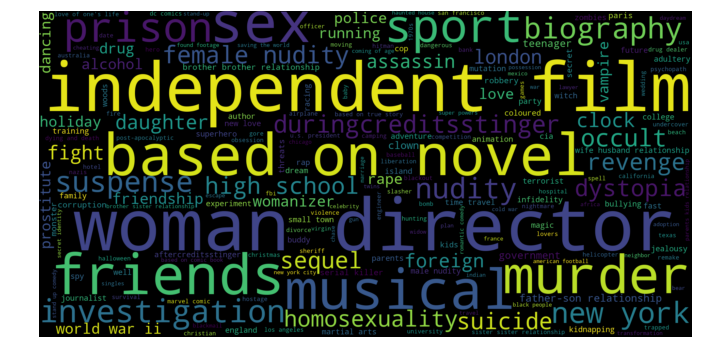

In [61]:
wordcloud = WordCloud(width=2000,height=1000)
wordcloud.generate_from_frequencies(words)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

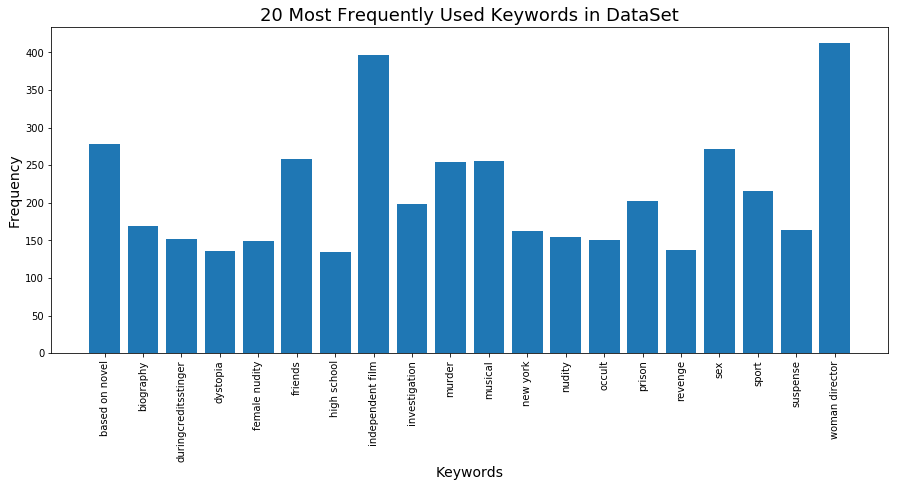

In [62]:
x= list(words)[:20]
y= list(words.values())[:20]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Keywords', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("20 Most Frequently Used Keywords in DataSet", fontsize=18)
plt.bar(x,y);

**Cast**

This shows us that Robert De Niro, Samuel L. Jackson and Nicolas Cage seem to be in a lot of movies. Given what I see in the media and the length of time that these actors have been active in Hollywood, this does not surprise me too much. 

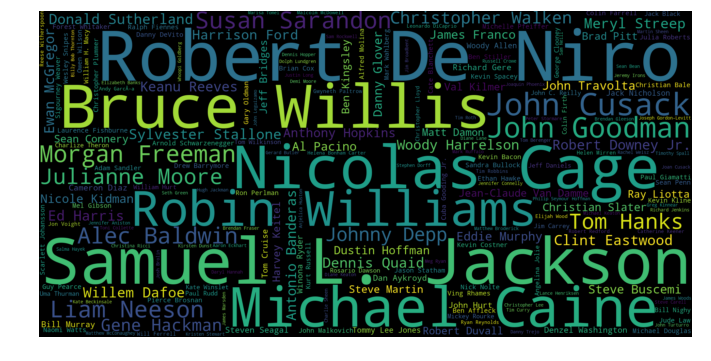

In [63]:
wordcloud.generate_from_frequencies(cast)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

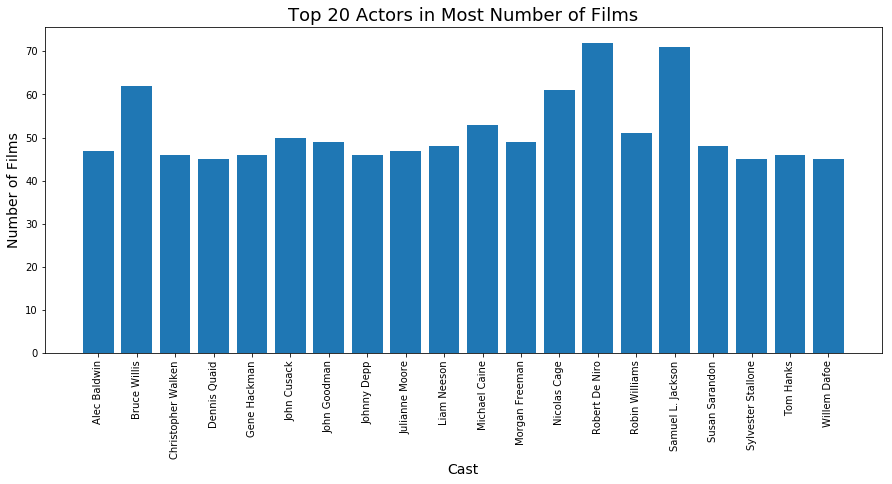

In [64]:
x= list(cast)[:20]
y= list(cast.values())[:20]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Cast', fontsize=14)
plt.ylabel('Number of Films', fontsize=14)
plt.title("Top 20 Actors in Most Number of Films", fontsize=18)
plt.bar(x,y);

**Genres**

Drama appears to have the widest amount of selection, followed closely by Thriller and Comedy.

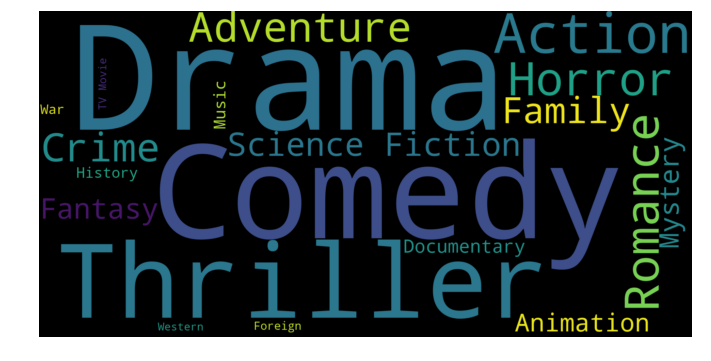

In [65]:
wordcloud.generate_from_frequencies(genres)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

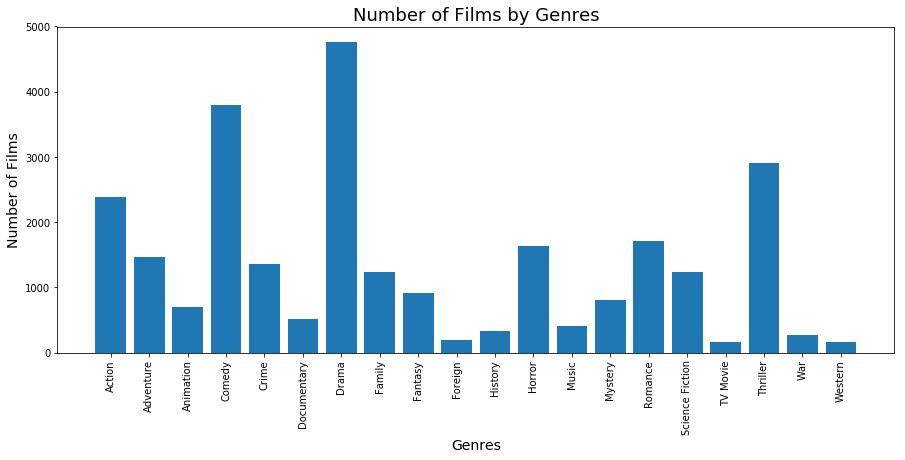

In [66]:
x= list(genres)
y= list(genres.values())

plt.figure(figsize=(15,6))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Films', fontsize=14)
plt.title("Number of Films by Genres", fontsize=18)
plt.bar(x,y);

**Production Companies**

Universal Pictures has produced the most amount of movies.

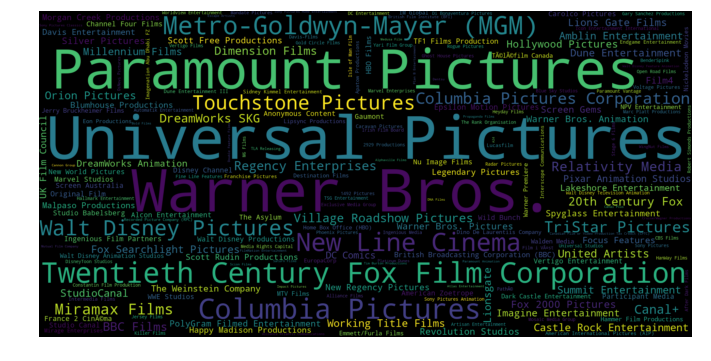

In [67]:
wordcloud.generate_from_frequencies(production)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

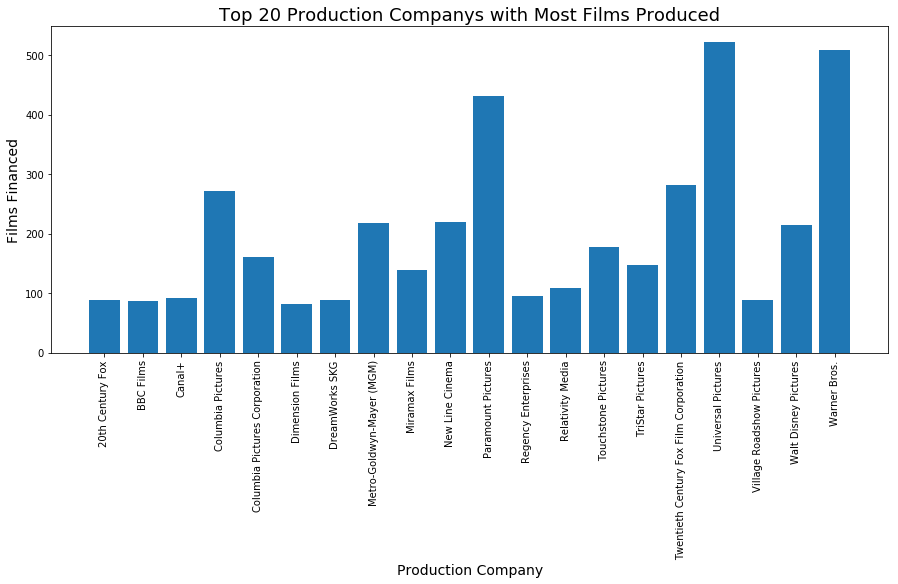

In [68]:
x= list(production)[:20]
y= list(production.values())[:20]

plt.figure(figsize=(15,6))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Production Company', fontsize=14)
plt.ylabel('Films Financed', fontsize=14)
plt.title("Top 20 Production Companys with Most Films Produced", fontsize=18)
plt.bar(x,y);

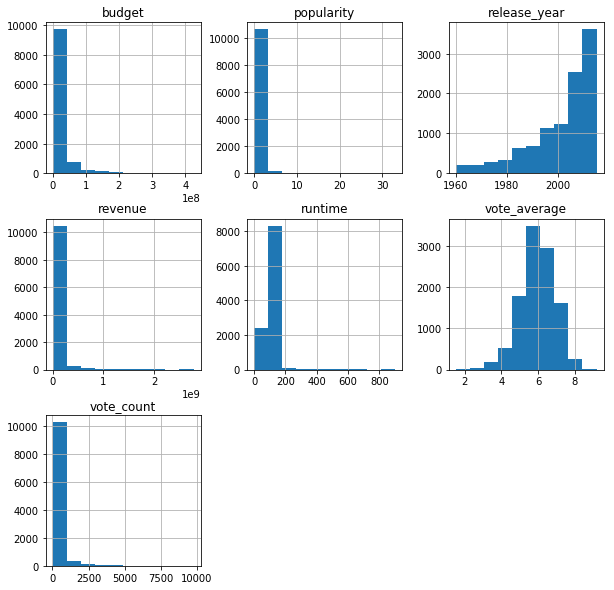

In [69]:
#Check distribution of other columns
df.hist(figsize=(10,10));

In [70]:
#sanity check - make sure that summary statistics correspond with visualizations
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646458,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000260,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000000,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.210000,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.380000,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.710000,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.990000,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


### Is there a relationship between the amount budgeted for a film, and its popularity?

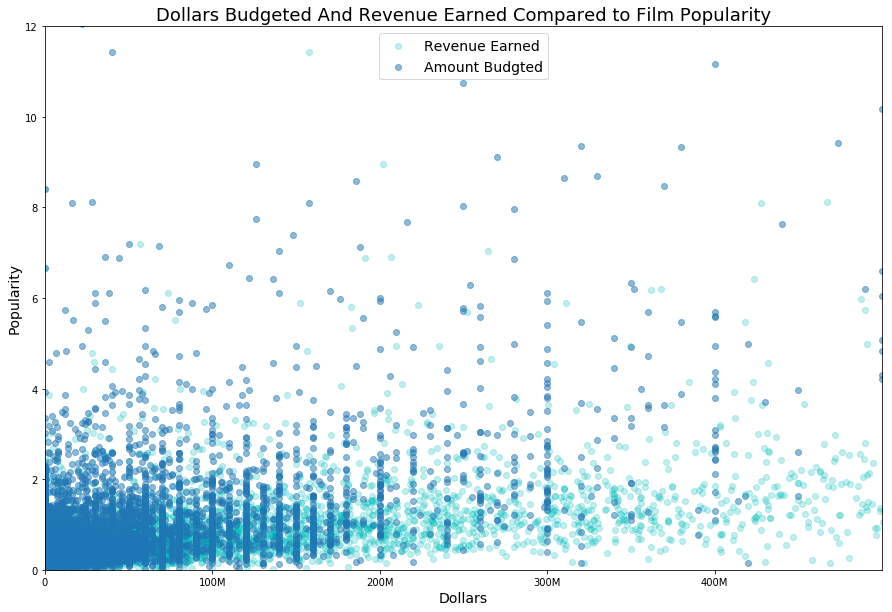

In [71]:
#Popularity vs Budget and Popularity vs Revenue
y = df['popularity']
x = df['revenue']
z = df['budget']

plt.figure(figsize=(15,10))

plt.ylabel('Popularity', fontsize=14)
plt.ylim(0,12)
plt.xlim(0,2.5*1e8)
plt.xlabel('Dollars', fontsize=14)
plt.xticks(np.arange(0,2.5*1e8, step=0.5*1e8),[0, '100M', '200M', '300M','400M', '500M'])
plt.title("Dollars Budgeted And Revenue Earned Compared to Film Popularity", fontsize=18)

revenue = plt.scatter(x, y, c='c', alpha=0.25)
budget = plt.scatter(z, y, alpha=0.5)
plt.legend([revenue, budget],['Revenue Earned', 'Amount Budgted'], fontsize=14);

There appears to be some sort of relationship between the amount of money budgeted towards a film, and how popular a film is.
However, the relationship does not look to be as strong when it comes to revenue earned. This will merits further investigation and analysis. 

### Is there a relationship between the number of films an actor is in, and the popularity of a film?

The first step is to group all the movies by actor, and calculate the mean revenue and popularity for all their movies, and then create a scatter plot. I will be plotting the amount of movies and actor was in, and compare this to average popularity score for all movies the actor was in. I will also be using a color scale to represent the average amount of revenue these movies earned.

In [72]:
cols = ['popularity', 'revenue', 'cast', 'original_title', 'release_year']
df_c = df[cols][df['cast'].isnull() ==False]

length = [len(row) for row in df_c['cast']]
df_cast = pd.DataFrame({'popularity': np.repeat(df_c['popularity'].values,length),
                        'revenue': np.repeat(df_c['revenue'].values,length),
                        'original_title': np.repeat(df_c['original_title'].values,length),
                        'release_year': np.repeat(df_c['release_year'].values,length),
                        'cast': np.hstack(df_c['cast'])
                       })

df_cast_agg = df_cast.groupby(['cast'])['revenue', 'popularity'].mean()
df_cast_agg['movie_count'] = df_cast.groupby('cast')['original_title'].count()
df_cast_agg = df_cast_agg.sort_values('movie_count', ascending=False)

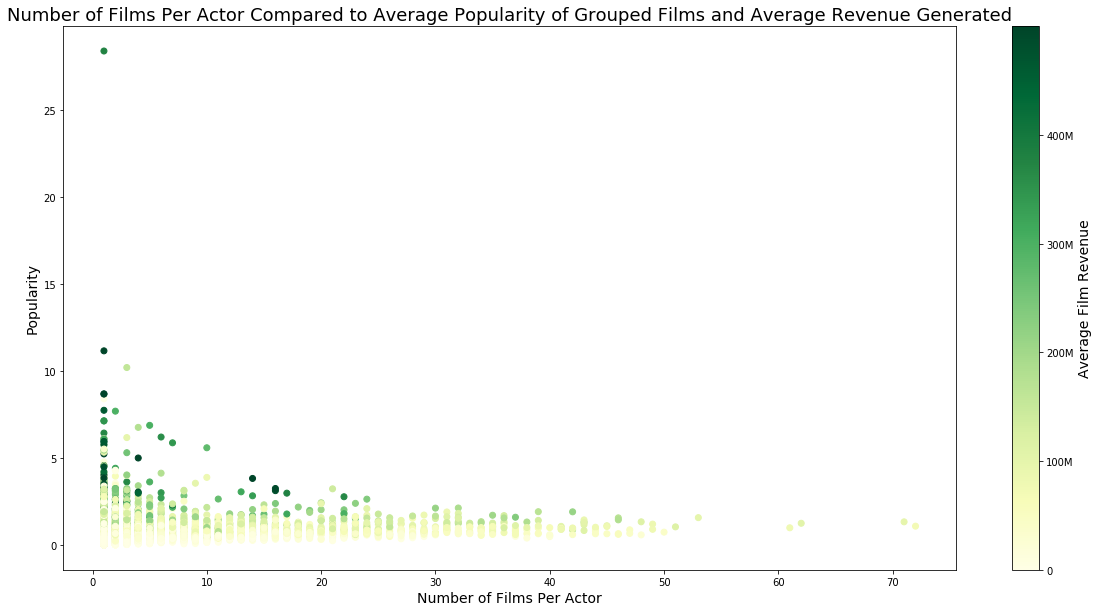

In [73]:
x=df_cast_agg['movie_count']
y=df_cast_agg['popularity']
colors = df_cast_agg['revenue']

plt.figure(figsize=(20,10))
plt.xlabel('Number of Films Per Actor', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title("Number of Films Per Actor Compared to Average Popularity of Grouped Films and Average Revenue Generated", fontsize=18)
plt.scatter(x, y, c=colors, cmap='YlGn')

labels = [0, '100M', '200M', '300M','400M', '500M']
cbar = plt.colorbar()
plt.clim(0,0.5*1e9)
cbar.set_label('Average Film Revenue', fontsize=14)
cbar.set_ticks([np.arange(0,0.5*1e9, step=0.1*1e9)])
cbar.set_ticklabels(labels);

Although we can see evidence of a correlation between revenue and populairty, when looking at the average popularity for movies per actor, actors who have been in a lot of movies seem to have lower average popularity scores. This actually isn't that surprising, as the more movies you do, the more likely that not all movies will be hits.

To explore further, it would be interesting to see if the popularity of a movie improves as the actor takes part in more films. The maximum amount of movies is 72 with Robert De Niro, however he seems to be an outlier. I will compare all actors who have been in at least 10 to 20 movies with actors 

In [74]:
df_cast_movie = df_cast
df_cast_movie['release_year'] = df_cast_movie['release_year'].astype(int)
df_cast_movie = df_cast_movie.reset_index(drop=True)

In [75]:
#Segregate all actors based on the amount of movies they have been in, and then group by release date so that we can calculate
#mean popularity and revenue per year for actors in said grouping - I tried to loop this but kept receiving errors - I know
#it is not very pythonic

actors_single_movie = df_cast_agg[df_cast_agg['movie_count'] == 1].reset_index().drop(columns=['revenue', 'popularity'])
actors_single_movie = pd.merge(actors_single_movie, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_2to5_movies = df_cast_agg[(df_cast_agg['movie_count'] >= 2) & (df_cast_agg['movie_count'] <= 5)].reset_index().drop(columns=['revenue', 'popularity'])
actors_2to5_movies = pd.merge(actors_2to5_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_6to10_movies = df_cast_agg[(df_cast_agg['movie_count'] >= 6) & (df_cast_agg['movie_count'] <= 10)].reset_index().drop(columns=['revenue', 'popularity'])
actors_6to10_movies = pd.merge(actors_6to10_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_11to15_movies = df_cast_agg[(df_cast_agg['movie_count'] >= 11) & (df_cast_agg['movie_count'] <= 15)].reset_index().drop(columns=['revenue', 'popularity'])                               
actors_11to15_movies = pd.merge(actors_11to15_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_16to20_movies = df_cast_agg[(df_cast_agg['movie_count'] >= 16) & (df_cast_agg['movie_count'] <= 20)].reset_index().drop(columns=['revenue', 'popularity'])
actors_16to20_movies = pd.merge(actors_16to20_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_21to30_movies = df_cast_agg[(df_cast_agg['movie_count'] >= 21) & (df_cast_agg['movie_count'] <= 30)].reset_index().drop(columns=['revenue', 'popularity'])
actors_21to30_movies = pd.merge(actors_21to30_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_31to40_movies = df_cast_agg[(df_cast_agg['movie_count'] >= 31) & (df_cast_agg['movie_count'] <= 40)].reset_index().drop(columns=['revenue', 'popularity'])
actors_31to40_movies = pd.merge(actors_31to40_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_41to50_movies = df_cast_agg[(df_cast_agg['movie_count'] >= 41) & (df_cast_agg['movie_count'] <= 50)].reset_index().drop(columns=['revenue', 'popularity'])
actors_41to50_movies = pd.merge(actors_41to50_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

actors_51to75_movies = df_cast_agg[df_cast_agg['movie_count'] >= 51].reset_index().drop(columns=['revenue', 'popularity'])
actors_51to75_movies = pd.merge(actors_51to75_movies, df_cast_movie, how='inner', on='cast').groupby('release_year', as_index=False)['popularity', 'revenue'].mean()

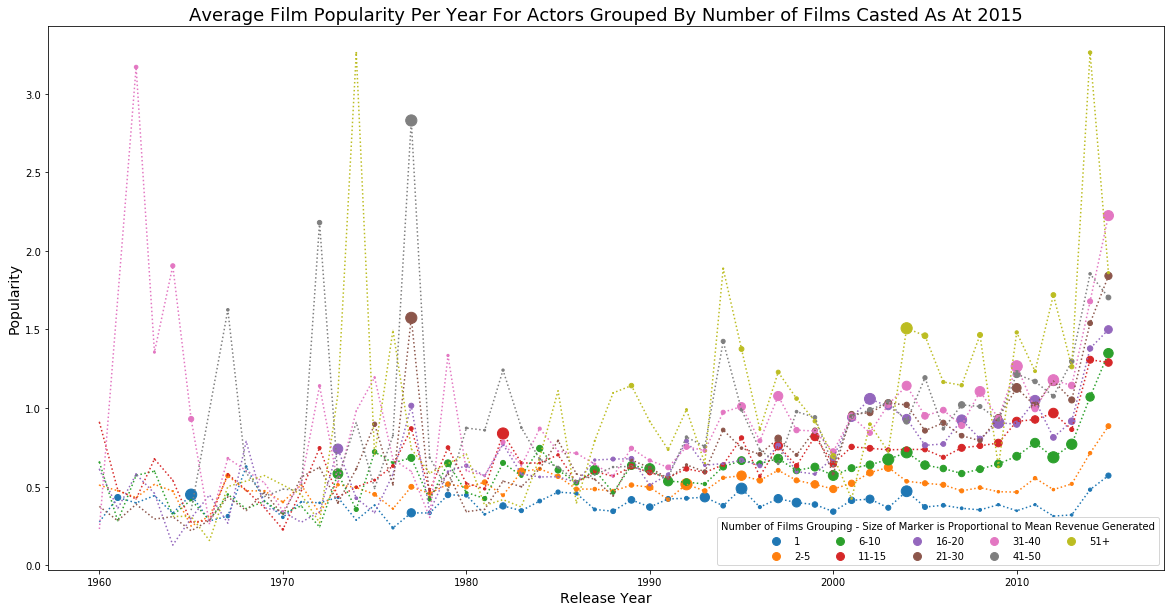

In [76]:
plt.figure(figsize=(20,10))

dataframes = [actors_single_movie, actors_2to5_movies, actors_6to10_movies, actors_11to15_movies, actors_16to20_movies, 
             actors_21to30_movies, actors_31to40_movies, actors_41to50_movies, actors_51to75_movies]

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

ax1_labels = ['1', '2-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51+']

for i in range(len(dataframes)):
    
    x = dataframes[i]['release_year']
    y = dataframes[i]['popularity']
    z = dataframes[i]['revenue'] 
    z_normed = z / z.max(axis=0)
    
    a = (z_normed*5)**3
    
    ax1 = plt.scatter(x, y, s=a, label=ax1_labels[i])
    ax2 = plt.plot(x, y, ls=':', label='')

plt.legend(title='Number of Films Grouping - Size of Marker is Proportional to Mean Revenue Generated', ncol=5)
plt.title('Average Film Popularity Per Year For Actors Grouped By Number of Films Casted As At 2015', fontsize=18);

Although we can see an upwards trend, due to the volatility of the scores it is difficult to determine if there truly is a relationship between how many films an actor was in, and a the popularity of a film. This will also need to be investigated further.

<a id='conclusions'></a>
## Conclusions

From our exploratory analysis, we have discovered popular keywords, genres, actors and production companies. It would be interesting to see how that has changed over the years, and if external global events influence what is popular in a given year. 

We were also able to see that there is a pattern between the amount budgeted towards a movie, and how popular the movie was. While tentative, it appears as though the "sweet spot" is a budget between 100 and 200 million dollars. This is an interesting objective to analyze especially given the rising costs in movie production.

We also looked into whether popular actors helped boost the popularity of the movie. It is too early to tell if there is a pattern, however we do see a slight upwards trend in popularity. This does not appear to translate into revenue though. From a cost perspective, more experienced and famous actors will be more expensive, albeit the quality of the acting should be superior due to experience. This also would be interesting to look into further in order to see if name recognition really affects popularity, and to determine if there is point of diminishing returns. 

These questions, among others, merit further investigation.

**Limitations**

1. There was a lot of variability betweeen the popularity of a movie. This will need to be investigated further so we can understand 
why that is the case and how that affects our numbers.
2. We must consider that newer movies will also be more popular than older movies, and we will need to investigate as at when TMBd started tracking their results. For movies in 1965, if they were only added to their library in 2014 for example, people won't necessarily realize that the movie has been added to the database immediately even if it is a favourite. For new movies, due to media, these will be a lot more hype surrounding its release.
3. We did not consider inflation when it comes to revenue, nor different revenue sources pertaining to films.
4. We are unsure as to how TMBd determined popularity, and is thus taken at face value.
5. Only descriptive analysis was performed, therefore even if we did find a pattern, we could not extrapolate the results to the rest of the population.

**Resources**
1. Matplotlib documentation;
2. Videos from Udacity;
3. Pandas documentation;
4. Stackoverflow - https://stackoverflow.com/questions/20130227/matplotlib-connect-scatterplot-points-with-line-python;